In [ ]:
!pip uninstall --yes gdown # After running this line, restart Colab runtime.
!pip install gdown -U --no-cache-dir

Found existing installation: gdown 4.6.6
Uninstalling gdown-4.6.6:
  Successfully uninstalled gdown-4.6.6


In [ ]:
import gdown

url = 'https://drive.google.com/drive/folders/1Z7R1g3CJjXe8NVXN7FLzyW6Mx5Vbrp-s?usp=sharing'

gdown.download_folder(url)

Retrieving folder list


Processing file 1Negfad4d2T2qItcuTELTvCk3T8E6gbgL Dig-MNIST.csv
Processing file 1ga4Xk7DJO_kuL6rTyPTEvTA6VnYsvMmp test.csv
Processing file 1JYE626LB8XETG-1So8P2Hw65HaFMNVAI train.csv
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1Negfad4d2T2qItcuTELTvCk3T8E6gbgL
To: /content/kanada/Dig-MNIST.csv
100%|██████████| 18.4M/18.4M [00:00<00:00, 33.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ga4Xk7DJO_kuL6rTyPTEvTA6VnYsvMmp
To: /content/kanada/test.csv
100%|██████████| 8.67M/8.67M [00:00<00:00, 63.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JYE626LB8XETG-1So8P2Hw65HaFMNVAI
To: /content/kanada/train.csv
100%|██████████| 105M/105M [00:01<00:00, 54.7MB/s] 
Download completed


['/content/kanada/Dig-MNIST.csv',
 '/content/kanada/test.csv',
 '/content/kanada/train.csv']

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_df=pd.read_csv("/content/kanada/train.csv")
test_df=pd.read_csv("/content/kanada/test.csv")

In [ ]:
names=train_df.drop('label',axis=1).columns
names

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [ ]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pca_train=PCA(n_components=4,whiten=True)
pca_train.fit(train_df.drop('label',axis=1))

PCA(n_components=4, whiten=True)

In [ ]:
transformed=pca_train.transform(train_df.drop('label',axis=1))
pd_transform=pd.DataFrame(transformed)
pd_transform

,0,1,2,3
0,1.369109,-0.722036,0.089548,-1.080358
1,0.677439,-0.264812,0.160973,-1.839627
2,-0.965913,1.754149,1.314666,-0.511108
3,-0.780289,0.273289,-1.261044,-0.028509
4,-0.217992,0.009666,-1.566405,0.420695
...,...,...,...,...
59995,-0.478651,1.043596,2.247576,0.485599
59996,-0.934635,0.123979,0.385449,-0.689634
59997,-1.290992,0.016138,1.426909,-1.177582
59998,1.751402,-0.287175,0.898961,1.544095


In [ ]:
original_transform=pca_train.inverse_transform(transformed)
pd_original=pd.DataFrame(original_transform)
pd_original

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-8.433106e-15,-1.064794e-14,-2.036263e-14,7.242405e-16,-1.641097e-16,0.003761,0.013383,-0.002043,0.002175,0.027887,...,0.030034,0.027099,0.018098,0.033983,0.026805,0.001122,0.007823,0.0,-0.000360,0.0
1,4.765442e-15,-1.572536e-14,-3.371377e-14,1.220921e-15,-3.188060e-16,0.016203,0.053125,0.029266,0.081640,0.150030,...,0.032642,0.019590,0.008056,0.018952,0.025410,-0.000099,0.008841,0.0,0.002523,0.0
2,5.090999e-14,1.560734e-14,-2.870838e-15,3.040194e-16,5.185649e-17,0.037665,0.126655,0.157050,0.338805,0.513580,...,0.016095,0.023864,0.019502,0.033269,0.019743,0.001767,0.001731,0.0,0.005289,0.0
3,-7.333668e-15,-1.493442e-14,-4.940036e-15,2.721650e-17,-2.330941e-16,0.007838,0.014666,0.009464,0.030037,0.023631,...,0.011904,-0.005065,-0.006539,-0.011705,-0.003245,-0.000320,0.003779,0.0,0.007350,0.0
4,-1.761056e-14,-1.508570e-14,1.994064e-15,-2.642791e-16,-1.868928e-16,-0.001857,-0.019614,-0.022938,-0.043180,-0.093182,...,0.011088,-0.001848,-0.001684,-0.004650,-0.003166,0.000300,0.003315,0.0,0.005820,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,4.157925e-14,3.438903e-14,1.834039e-14,-3.561078e-16,4.353157e-16,0.028873,0.111389,0.164293,0.324017,0.508949,...,0.010656,0.040166,0.038427,0.062774,0.025775,0.003887,0.000022,0.0,0.000304,0.0
59996,9.205919e-15,-1.509079e-15,-1.123396e-14,4.518993e-16,-7.340754e-17,0.021604,0.076724,0.078699,0.167273,0.268633,...,0.016262,0.009067,0.003404,0.007251,0.010312,0.000199,0.004917,0.0,0.005006,0.0
59997,1.962190e-14,6.272695e-15,-1.652453e-14,7.669504e-16,1.456259e-17,0.032093,0.122728,0.127888,0.265631,0.442513,...,0.018244,0.015002,0.006525,0.014056,0.016992,0.000227,0.005763,0.0,0.004169,0.0
59998,-3.107941e-15,2.467799e-14,3.166214e-14,-1.028091e-15,4.664368e-16,-0.007680,-0.018275,0.025413,0.020316,0.035215,...,0.012633,0.048612,0.050193,0.080366,0.027182,0.005303,0.000444,0.0,-0.005090,0.0


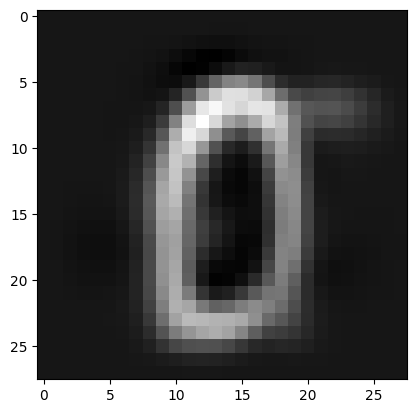

In [ ]:
plt.imshow(pd_original[0:1].to_numpy().reshape(28,28),cmap="gray")

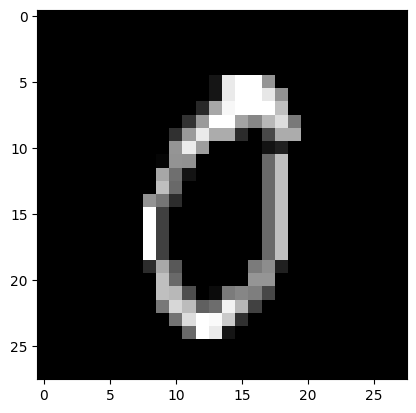

In [ ]:
plt.imshow(train_df.drop('label',axis=1)[0:1].to_numpy().reshape(28,28),cmap="gray")

In [ ]:
import random

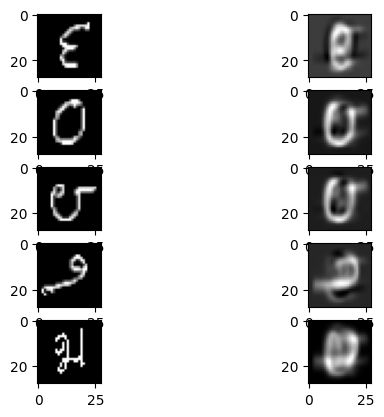

In [ ]:
n = 5
fig, ax = plt.subplots(n,2)
for i in range(n):
   x = random.randint(0, 783)
   ax[i, 0].imshow(train_df.drop('label',axis=1)[x : x+1].to_numpy().reshape(28, 28), cmap= 'gray')
   ax[i, 1].imshow(pd_original[x : x+1].to_numpy().reshape(28, 28), cmap= 'gray')
plt.show()

#Autoencoders

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import torch.optim as optim
from tqdm import tqdm

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, k):
        super(Autoencoder, self).__init__()
        self.encoder_layer1 = nn.Linear(784, 500)
        self.encoder_layer2 = nn.Linear(500, 250)
        self.encoder_layer3 = nn.Linear(250, k)

        self.decoder_layer1 = nn.Linear(k, 250)
        self.decoder_layer2 = nn.Linear(250, 500)
        self.decoder_layer3 = nn.Linear(500, 784)

    def forward(self, x):
        encoded = self.encoder_layer1(x)
        encoded = self.encoder_layer2(encoded)
        encoded = self.encoder_layer3(encoded)

        decoded = self.decoder_layer1(encoded)
        decoded = self.decoder_layer2(decoded)
        decoded = self.decoder_layer3(decoded)

        return decoded

In [ ]:
class KanadaMnist(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        self.pixels = self.data.iloc[:, 1:].values.astype(float)/255.0

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        pixels = self.pixels[idx]
        return torch.tensor(pixels, dtype=torch.float32)

In [ ]:
train_data=KanadaMnist("/content/kanada/train.csv")
test_data=KanadaMnist("/content/kanada/test.csv")

In [ ]:
k=4
autoencoderModel=Autoencoder(k)

In [ ]:
autoencoderModel

Autoencoder(
  (encoder_layer1): Linear(in_features=784, out_features=500, bias=True)
  (encoder_layer2): Linear(in_features=500, out_features=250, bias=True)
  (encoder_layer3): Linear(in_features=250, out_features=4, bias=True)
  (decoder_layer1): Linear(in_features=4, out_features=250, bias=True)
  (decoder_layer2): Linear(in_features=250, out_features=500, bias=True)
  (decoder_layer3): Linear(in_features=500, out_features=784, bias=True)
)

In [ ]:
batch_size=64
train=DataLoader(train_data,batch_size=batch_size,shuffle=True)
test=DataLoader(test_data,batch_size=batch_size,shuffle=True)

In [ ]:
learning_rate=0.001
num_epochs=20

In [ ]:
loss_fn=nn.MSELoss()
optimizer=optim.AdamW(autoencoderModel.parameters(),lr=learning_rate)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoderModel.to(device)

Autoencoder(
  (encoder_layer1): Linear(in_features=784, out_features=500, bias=True)
  (encoder_layer2): Linear(in_features=500, out_features=250, bias=True)
  (encoder_layer3): Linear(in_features=250, out_features=4, bias=True)
  (decoder_layer1): Linear(in_features=4, out_features=250, bias=True)
  (decoder_layer2): Linear(in_features=250, out_features=500, bias=True)
  (decoder_layer3): Linear(in_features=500, out_features=784, bias=True)
)

In [ ]:
num_batches = len(train_df) // batch_size

for epoch in range(num_epochs):
    total_loss = 0.0
    progress_bar = tqdm(range(num_batches), desc=f"Epoch [{epoch+1}/{num_epochs}]")

    autoencoderModel.train()  # Set the model to training mode
    for batch_idx in progress_bar:
        batch_start = batch_idx * batch_size
        batch_end = (batch_idx + 1) * batch_size

        batch_inputs = train_data[batch_start:batch_end].to(device)  # Move data to GPU
        optimizer.zero_grad()

        batch_outputs = autoencoderModel(batch_inputs)
        reconstruction_loss = loss_fn(batch_outputs, batch_inputs)
        reconstruction_loss.backward()
        optimizer.step()

        total_loss += reconstruction_loss.item() * batch_inputs.size(0)
        average_loss = total_loss / (batch_idx + 1) * batch_size

        progress_bar.set_postfix({"Avg Loss": f"{average_loss:.4f}"})

    progress_bar.close()
    autoencoderModel.eval()
    test_loss = 0.0
    with torch.no_grad():
        for test_batch in test_data:
            test_inputs = test_batch.to(device)
            test_outputs = autoencoderModel(test_inputs)
            test_loss += loss_fn(test_outputs, test_inputs).item() * test_inputs.size(0)

    average_test_loss = test_loss / len(test_df)
    print(f"Epoch [{epoch+1}/{num_epochs}], Test Loss: {average_test_loss:.4f}")

Epoch [1/20]: 100%|██████████| 937/937 [00:04<00:00, 188.71it/s, Avg Loss=153.2732]


Epoch [1/20], Test Loss: 28.7026


Epoch [2/20]: 100%|██████████| 937/937 [00:05<00:00, 186.29it/s, Avg Loss=153.1554]


Epoch [2/20], Test Loss: 28.3704


Epoch [3/20]: 100%|██████████| 937/937 [00:05<00:00, 182.30it/s, Avg Loss=426.4348]


Epoch [3/20], Test Loss: 28.8545


Epoch [4/20]: 100%|██████████| 937/937 [00:04<00:00, 188.71it/s, Avg Loss=155.4152]


Epoch [4/20], Test Loss: 28.3802


Epoch [5/20]: 100%|██████████| 937/937 [00:05<00:00, 184.25it/s, Avg Loss=154.4369]


Epoch [5/20], Test Loss: 28.3045


Epoch [6/20]: 100%|██████████| 937/937 [00:05<00:00, 177.44it/s, Avg Loss=154.2017]


Epoch [6/20], Test Loss: 28.3487


Epoch [7/20]: 100%|██████████| 937/937 [00:05<00:00, 178.02it/s, Avg Loss=154.0906]


Epoch [7/20], Test Loss: 28.2936


Epoch [8/20]: 100%|██████████| 937/937 [00:04<00:00, 190.07it/s, Avg Loss=154.4212]


Epoch [8/20], Test Loss: 28.2442


Epoch [9/20]: 100%|██████████| 937/937 [00:04<00:00, 188.14it/s, Avg Loss=153.7268]


Epoch [9/20], Test Loss: 28.2118


Epoch [10/20]: 100%|██████████| 937/937 [00:04<00:00, 192.45it/s, Avg Loss=153.6296]


Epoch [10/20], Test Loss: 28.2102


Epoch [11/20]: 100%|██████████| 937/937 [00:04<00:00, 191.37it/s, Avg Loss=153.6961]


Epoch [11/20], Test Loss: 28.2186


Epoch [12/20]: 100%|██████████| 937/937 [00:04<00:00, 193.04it/s, Avg Loss=153.3100]


Epoch [12/20], Test Loss: 28.2234


Epoch [13/20]: 100%|██████████| 937/937 [00:04<00:00, 195.21it/s, Avg Loss=153.2256]


Epoch [13/20], Test Loss: 28.2542


Epoch [14/20]: 100%|██████████| 937/937 [00:04<00:00, 187.59it/s, Avg Loss=153.1403]


Epoch [14/20], Test Loss: 28.2131


Epoch [15/20]: 100%|██████████| 937/937 [00:05<00:00, 187.01it/s, Avg Loss=597.2152]


Epoch [15/20], Test Loss: 34.6244


Epoch [16/20]: 100%|██████████| 937/937 [00:04<00:00, 191.42it/s, Avg Loss=163.0364]


Epoch [16/20], Test Loss: 28.6411


Epoch [17/20]: 100%|██████████| 937/937 [00:04<00:00, 188.44it/s, Avg Loss=155.3050]


Epoch [17/20], Test Loss: 28.3025


Epoch [18/20]: 100%|██████████| 937/937 [00:04<00:00, 194.25it/s, Avg Loss=154.1397]


Epoch [18/20], Test Loss: 28.1762


Epoch [19/20]: 100%|██████████| 937/937 [00:04<00:00, 190.76it/s, Avg Loss=153.7200]


Epoch [19/20], Test Loss: 28.1319


Epoch [20/20]: 100%|██████████| 937/937 [00:05<00:00, 185.20it/s, Avg Loss=153.6244]


Epoch [20/20], Test Loss: 28.1441
